# Lab1: 数据可视化探索分析

# 1.1 数据集概括性介绍

篮球巨星科比于1996年以13顺位的选秀身份进入NBA联盟，一生都效力于洛杉矶湖人队。于2016年宣布退役，职业生涯获奖无数，生涯总得分超33000分。
NBA官方提供的科比球场表现数据集收录了科比自1996赛季~2016赛季共30697条职业生涯数据。每条数据都是一次出手，其中包括动作类型，投篮类型，投射距离，投射位置，是否命中等25个特征。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns;sns.set()
#显示中文
plt.rcParams ['font.sans-serif'] = [u'SimHei'] 
plt.rcParams ['axes.unicode_minus'] = False
#忽略掉相关的警告提醒消息
import warnings
warnings.filterwarnings('ignore')
#显示全部数据
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

data = pd.read_csv('data/kobe.csv') 

In [2]:
data.shape

(30697, 25)

In [3]:
data.head()   

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

可以看到，有3个属性是浮点数类型，11个属性是整数类型，11个属性是object类型

 属性名称和含义

|       列名称       |                                含义                                |
|:------------------:|:------------------------------------------------------------------:|
| action_type        | 动作类型，分为跳投(Jump Shot)，跑跳投(Running Jump Shot)，扣篮(Driving Dunk Shot)，上篮(Layup Shot)，突破上篮(Driving Layup Shot)，灌篮(Slam Dunk Shot)，转身跳投(turnaround jump shot)等等                                       |
| combined_shot_type | 组合投篮类型，如跳投，扣篮，勾手，擦板，罚球                       |
| game_event_id      | 比赛的编号                                                         |
| lat                | 出手的纬度                                                         |
| loc_x              | 出手的x坐标                                                        |
| loc_y              | 出手的y坐标                                                        |
| lon                | 出手的经度                                                         |
| minutes_remaining  | 距离比赛结束，还剩多少分钟                                         |
| period             | 交手的场次，取值为1~7                                              |
| playoffs           | 是否是打季后赛                                                     |
| season             | 赛季，如13~14赛季                                                  |
| seconds_remaining  | 距离比赛结束，还剩多少秒                                           |
| shot_distance      | 出手距离                                                           |
| shot_made_flag     | 是否命中（研究目标）                                                           |
| shot_type          | 投射类型，两分球还是三分球                                         |
| shot_zone_area     | 投篮区域的表示方法一：左侧，右侧，中场，后场等                                 |
| shot_zone_basic    | 投篮区域的表示方法二:中线，禁区，油漆区，左侧底角，右侧底角等 |
| shot_zone_range    | 投篮区域的表示方法三:出手区域到篮筐的距离，小于8英尺，816英尺，1624英尺，24英尺以上等         |
| team_id            | 球队编号                                                           |
| team_name          | 球队名称                                                           |
| game_date          | 比赛日期                                                           |
| matchup            | 对阵双方                                                           |
| opponent           | 对手                                                               |
| game_id            | 比赛的编号                                                         |
| shot_id            | 镜头ID                                                         |

In [5]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
action_type,30697,57,Jump Shot,18880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
combined_shot_type,30697,6,Jump Shot,23485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_event_id,30697.0,NaN,NaN,NaN,249.1908,150.003712,2.0,110.0,253.0,368.0,659.0
game_id,30697.0,NaN,NaN,NaN,24764065.868065,7755174.890198,20000012.0,20500077.0,20900354.0,29600474.0,49900088.0
lat,30697.0,NaN,NaN,NaN,33.953192,0.087791,33.2533,33.8843,33.9703,34.0403,34.0883
loc_x,30697.0,NaN,NaN,NaN,7.110499,110.124578,-250.0,-68.0,0.0,95.0,248.0
loc_y,30697.0,NaN,NaN,NaN,91.107535,87.791361,-44.0,4.0,74.0,160.0,791.0
lon,30697.0,NaN,NaN,NaN,-118.26269,0.110125,-118.5198,-118.3378,-118.2698,-118.1748,-118.0218
minutes_remaining,30697.0,NaN,NaN,NaN,4.885624,3.449897,0.0,2.0,5.0,8.0,11.0
period,30697.0,NaN,NaN,NaN,2.519432,1.153665,1.0,1.0,3.0,3.0,7.0


In [6]:
data_train = data.replace(" ", np.nan)
print('Number of instances = %d' % (data_train.shape[0]))
print('Number of attributes = %d' % (data_train.shape[1]))
print('Number of missing values:')
print(data.isnull().sum())

Number of instances = 30697
Number of attributes = 25
Number of missing values:
action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64


数据质量

1.完整性：总共有30697条数据，shot_made_flag属性存在5000条缺失，其他属性均完整。

2.准确性：真实程度较高


## 绘制属性的箱线图

Text(0.5, 1.0, 'lat and lon')

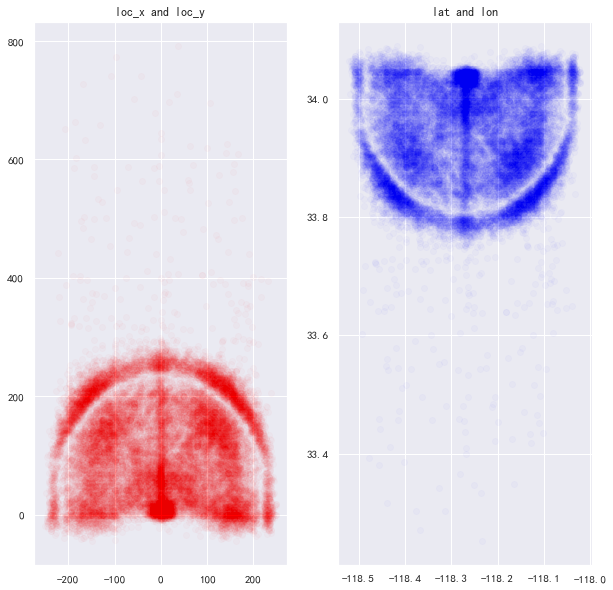

In [7]:
#plt.subplot(211) first is raw second Column
alpha = 0.02
plt.figure(figsize=(10,10)) #figsize=(10,10) 代表橫軸和縱軸的每英寸的寬度和高度。
 
# loc_x and loc_y
plt.subplot(121)    #121：代表一行2列子圖，後面的1代表放在第一個位置。
plt.scatter(data.loc_x, data.loc_y, c='red', alpha=alpha)  
#scatter：繪製散點圖，c是color顏色，也可以寫red；alpha介於0（透明）和1（不透明）之間。
#print(help(plt.scatter))
plt.title('loc_x and loc_y') #繪製標題
 
# lat and lon
plt.subplot(122)  
plt.scatter(data.lon, data.lat, color='blue', alpha=alpha) 
plt.title('lat and lon') 

Text(0.5, 1.0, '科比出手点x,y坐标的分布')

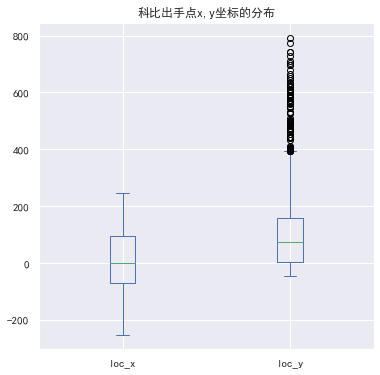

In [8]:
%matplotlib inline
data4 = data.loc[:,['loc_x','loc_y']]
data4.plot(kind='box',figsize=(6,6),grid=True)
plt.title('科比出手点x,y坐标的分布')


Text(0.5, 1.0, '科比出手距离的分布')

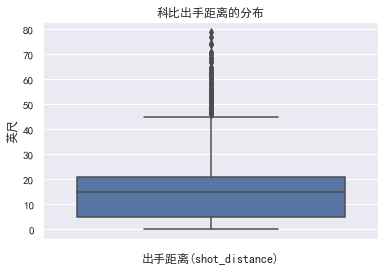

In [9]:
#绘制箱型图
plt.figure(figsize = (6,4))
sns.boxplot(data = data,y = 'shot_distance')
plt.xlabel('出手距离(shot_distance)');plt.ylabel('英尺');plt.title('科比出手距离的分布')

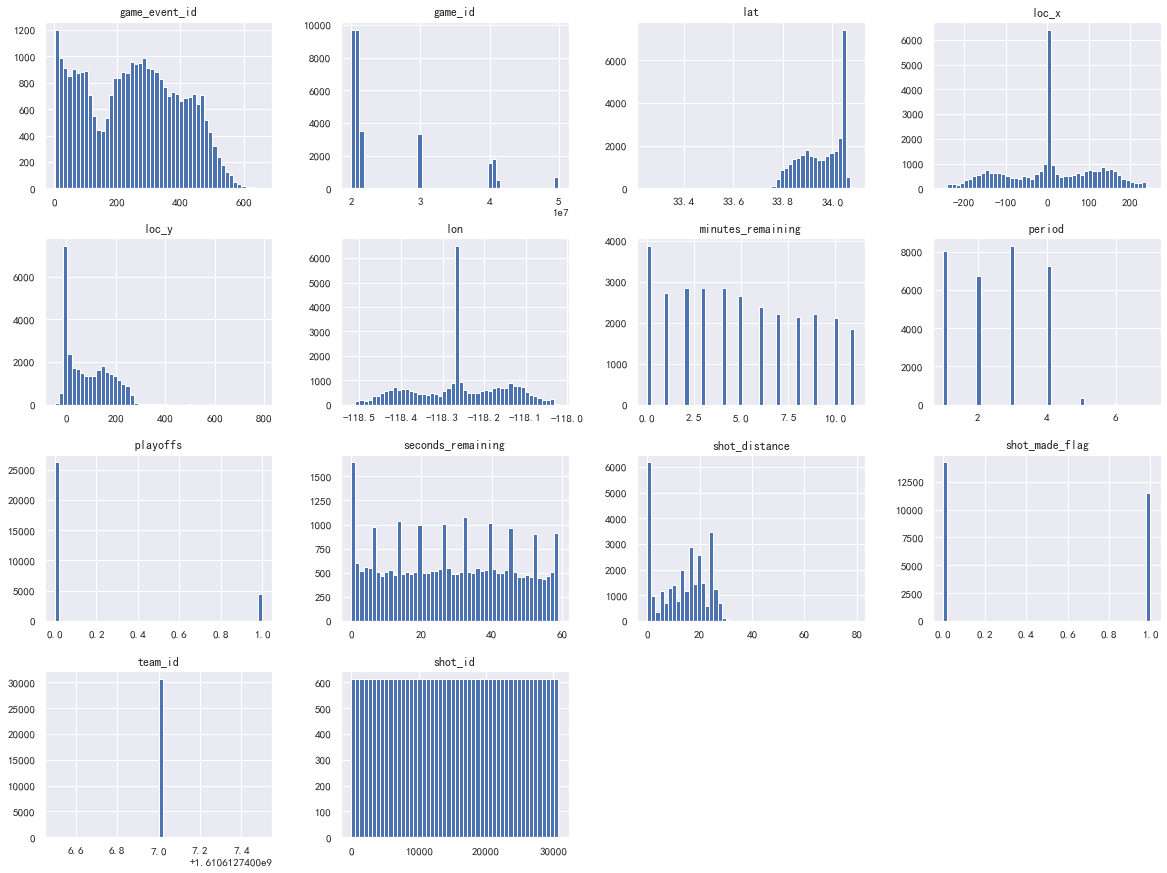

In [10]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, '科比出手距离的分布')

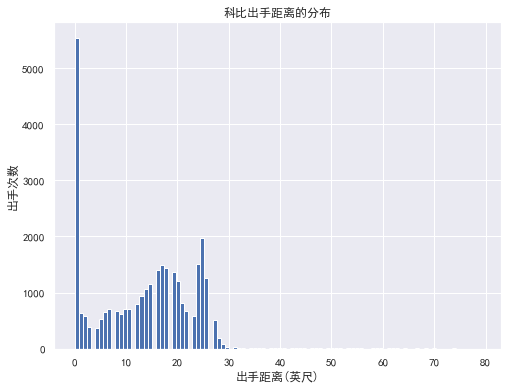

In [11]:
#查看科比出手距离的分布
plt.figure(figsize = (8,6))
data['shot_distance'].hist(bins = 100)
plt.xlabel('出手距离(英尺)');plt.ylabel('出手次数');plt.title('科比出手距离的分布')

科比出手距离从0到7.9英尺范围内均有分布，处于25%到75%的数据集中在0.5-2.1英尺之间，也有很多的数据点分布在箱线图之外，不呈现标准的正态分布。

由上图可以看出科比在篮下的出手最多，大约有6000次，大约75%的出手为2分球，25%为三分球。

Text(0.5, 1.0, '科比出手剩余时间的分布')

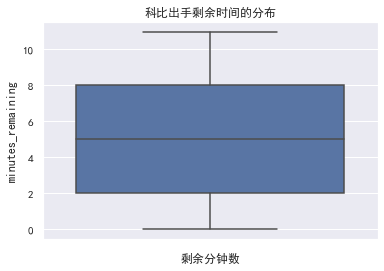

In [12]:

#绘制箱型图
plt.figure(figsize = (6,4))
sns.boxplot(data = data,y = 'minutes_remaining')
plt.xlabel('剩余分钟数');plt.title('科比出手剩余时间的分布')

分析分布情况和特点：


# 1.2 数据集可视化

## 每个赛季出手次数
我们对科比在每个赛季出手的次数做一个统计，按照出手次数的多少降序排列，我们对season（赛季）这一栏进行统计，查看有多少个赛季，之后将各个赛季出手次数统计并用柱状图绘制出来。

In [13]:
from pyecharts.charts import Bar
from pyecharts import options as opts
# 创建 Bar 类的对象, 并指定画布的大小
bar = Bar(init_opts=opts.InitOpts(width='1200px', height='300px' ))
# 添加 x 轴和 y 轴的数据
bar.add_xaxis(list(data['season'].unique()))
bar.add_yaxis("出手次数", list(data.season.value_counts()))
# 设置标题、y 轴标签
bar.set_global_opts(title_opts=opts.TitleOpts(title="科比在每个赛季的出手次数"),
                    yaxis_opts=opts.AxisOpts(name="出手次数", name_location="center", name_gap=30))
bar.render_notebook()

可以看到科比出手次数最多的赛季是2000年（01号赛季）随后逐年以微小的幅度递减，出手次数最少的时期则集中于他刚刚进入NBA联盟的1996-1999年。原因是1996-1997赛季，科比是NBA新人经常作为替补，出场机会不高，并且因为左边的髋屈肌拉伤和流感缺席两场比赛，1997-1998赛季，科比因脚踝扭伤缺席了3场比赛。随后科比经历了2012-2013赛季跟腱断裂，2013-2014赛季膝盖骨折，2014-2015赛季旋转轴肌腱撕裂。从整体来看，在每个赛季中科比出手的次数都是非常多的，可以说明科比是球队里的主战力之一。
## 词云

通过词云，我们来展示一下科比动作类型的丰富程度和频率的分布情况。

In [14]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType
a=data['action_type']
a=a.value_counts()
#a[0:]
a=dict(a)
name=pd.DataFrame(a.keys())
value=pd.DataFrame(a.values())
name=name[0].tolist()
value=value[0].tolist()
words=list(zip(list(name),list(value)))
word=WordCloud()
word.add("",words,word_size_range=[20, 200],)
word.set_global_opts(title_opts=opts.TitleOpts(title="WordCloud_action_type"))
word.render_notebook()
word.render_notebook()


在科比如此繁多的进球动作中，使用最多的是Layup Shot，共有2567次，其次是Driving Layuo Shot，共有1978次。

您可以使用我们的交互式图表来实时查看每个动作出现的次数。

## 饼图
来展示科比投篮时出手位置的分布情况

In [15]:
from pyecharts import options as opts
from pyecharts.charts import Page, Pie
from pyecharts.faker import Faker


data['shot_zone_area'].unique()
b=data['shot_zone_area']
b=b.value_counts()
b=dict(b)
name=pd.DataFrame(b.keys())
value=pd.DataFrame(b.values())
name=name[0].tolist()
value=value[0].tolist()
words=list(zip(list(name),list(value)))


h=list(zip( list(b.keys()),list(b.values())))
pie = Pie()
pie.add("",words)
# pie.set_global_opts(title_opts=opts.TitleOpts(title="出手位置的分布情况"))
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
pie.render_notebook()


(array([0, 1]), [Text(0, 0, '2PT Field Goal'), Text(1, 0, '3PT Field Goal')])

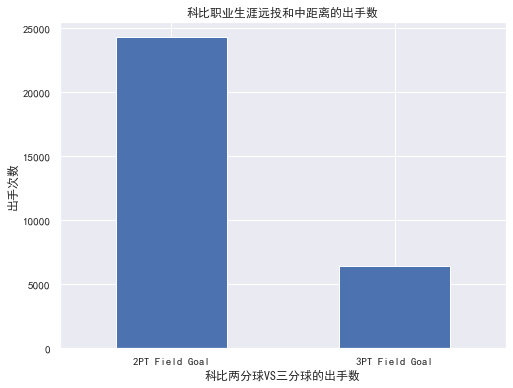

In [16]:
#查看科比两分球，三分球的出手数
plt.figure(figsize = (8,6))
data['shot_type'].value_counts().plot(kind = 'bar')
plt.xlabel('科比两分球VS三分球的出手数');plt.ylabel('出手次数');plt.title('科比职业生涯远投和中距离的出手数')
plt.xticks(rotation = 0)

由上图可以看出，科比的进攻手段主要以中距离进攻为主，像我们比较熟悉的急停跳投，翻身跳投，干拔跳投等。

折线图

In [17]:
import pyecharts.options as opts
from pyecharts.charts import Line
season = data.pivot_table(index='season', values='shot_made_flag', aggfunc='mean')
z=season.values
x=z.tolist()
l=[]
for i in x:
    l.append(round(i[0],2))
line_demo = (
    Line()
    # 添加x轴、y轴的数据、系列名称
    .add_xaxis(list(season.index))
    .add_yaxis('命中率', l, symbol='diamond', symbol_size=10,is_symbol_show=True)
    # 设置标题、y 轴标签
    .set_global_opts(title_opts=opts.TitleOpts(title="科比职业生涯各赛季命中率示意图"), 
                   yaxis_opts=opts.AxisOpts(name="命中率",name_location="center", name_gap=30))
)
line_demo.render_notebook()

科比投篮命中率在前五年呈现上涨趋势，中间部分因为伤病原因有所波动，在经过2013年的跟腱断裂后命中率逐年走低。

In [18]:
import pyecharts.options as opts
from pyecharts.charts import Line
p_1 = data[data['period'] == 1].pivot_table(index='season', values='shot_made_flag', aggfunc='mean')  # 第一节
p_2 = data[data['period'] == 2].pivot_table(index='season', values='shot_made_flag', aggfunc='mean')  # 第二节
p_3 = data[data['period'] == 3].pivot_table(index='season', values='shot_made_flag', aggfunc='mean')  # 第三节
p_4 = data[data['period'] == 4].pivot_table(index='season', values='shot_made_flag', aggfunc='mean')  # 第四节
l1=list(p_1['shot_made_flag'])
f1=[round(i,2) for i in l1]
l2=list(p_2['shot_made_flag'])
f2=[round(i,2) for i in l2]
l3=list(p_3['shot_made_flag'])
f3=[round(i,2) for i in l3]
l4=list(p_4['shot_made_flag'])
f4=[round(i,2) for i in l4]
line_demo = (
    Line()
    # 添加x轴、y轴的数据、系列名称
    .add_xaxis(list(season.index))
    .add_yaxis('第一节', f1, symbol='diamond', symbol_size=5,is_smooth=True,is_symbol_show=True)
    .add_yaxis('第二节', f2, symbol='triangle', symbol_size=5,is_smooth=True,is_symbol_show=True)
    .add_yaxis('第三节', f3, symbol='emptyCircle', symbol_size=5,is_smooth=True,is_symbol_show=True)
    .add_yaxis('第四节', f4, symbol='arrow', symbol_size=5,is_smooth=True,is_symbol_show=True)
    # 设置标题、y 轴标签
    .set_global_opts(title_opts=opts.TitleOpts(title="科比职业生涯各节命中率示意图"), 
                   yaxis_opts=opts.AxisOpts(name="命中率",name_location="center", name_gap=30))
)
line_demo.render_notebook()

从示意图可以看出科比在第四节的命中率最低，这也可以说明体力对科比投篮命中率有很大的影响。

投篮位置

我们选取combined_shot_type属性中各个出手方式，有跳投、上篮、扣篮、补篮、勾手、擦板，不同的出手方式以不同的颜色通过散点图的方式将出手位置在图上绘制出来，得到以下散点图。

Text(0.5, 1.0, '投篮位置')

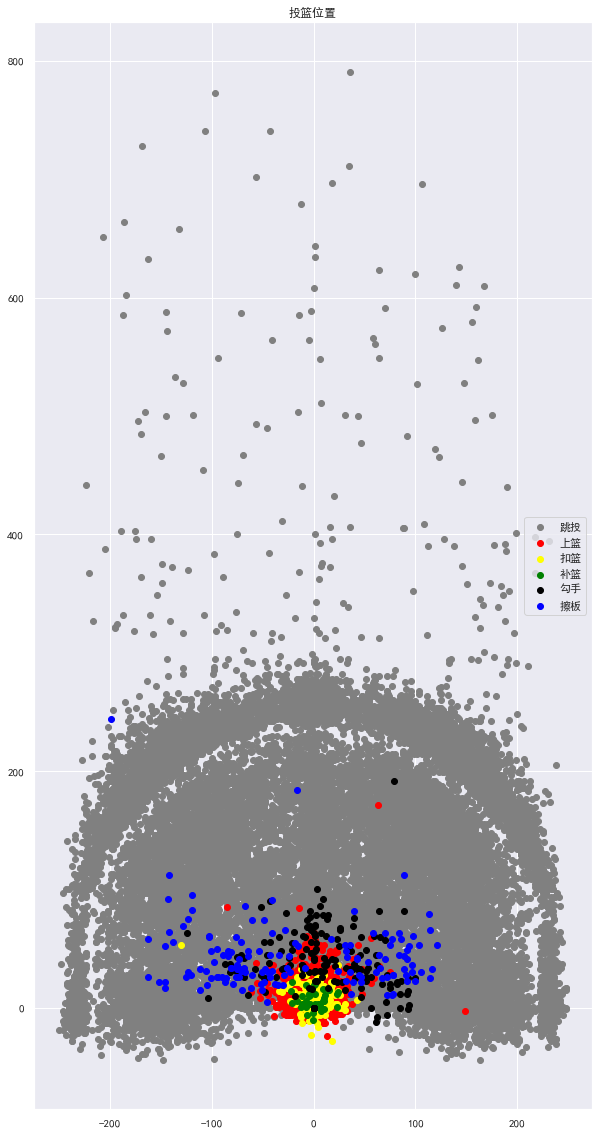

In [19]:
#科比投篮位置
plt.figure(figsize=(10,20))
jumpshot = data[data['combined_shot_type']=='Jump Shot']
layup = data[data['combined_shot_type']=='Layup']
dunk = data[data['combined_shot_type']=='Dunk']
tipshot = data[data['combined_shot_type']=='Tip Shot']
hookshot = data[data['combined_shot_type']=='Hook Shot']
bankshot = data[data['combined_shot_type']=='Bank Shot']
plt.scatter(jumpshot.loc_x, jumpshot.loc_y, color='grey')
plt.scatter(layup.loc_x, layup.loc_y, color='red')
plt.scatter(dunk.loc_x, dunk.loc_y, color='yellow' )
plt.scatter(tipshot.loc_x, tipshot.loc_y, color='green')
plt.scatter(hookshot.loc_x, hookshot.loc_y, color='black')
plt.scatter(bankshot.loc_x, bankshot.loc_y, color='blue')
label=['跳投','上篮','扣篮','补篮','勾手','擦板']
plt.legend(label,loc=7)
plt.title('投篮位置')


从图中可以看出篮球场大致的外观，其中红黄绿聚集的地方是球框底下，这里适合上篮、扣篮和补篮，再看灰色点（跳投），灰色点之间存在一条明显的分界线，而这条分界线就是三分线，科比出手的位置可以说是遍布整个球场，这也说明科比出手最多的方式是跳投。

Text(0.5, 1.0, '投篮位置')

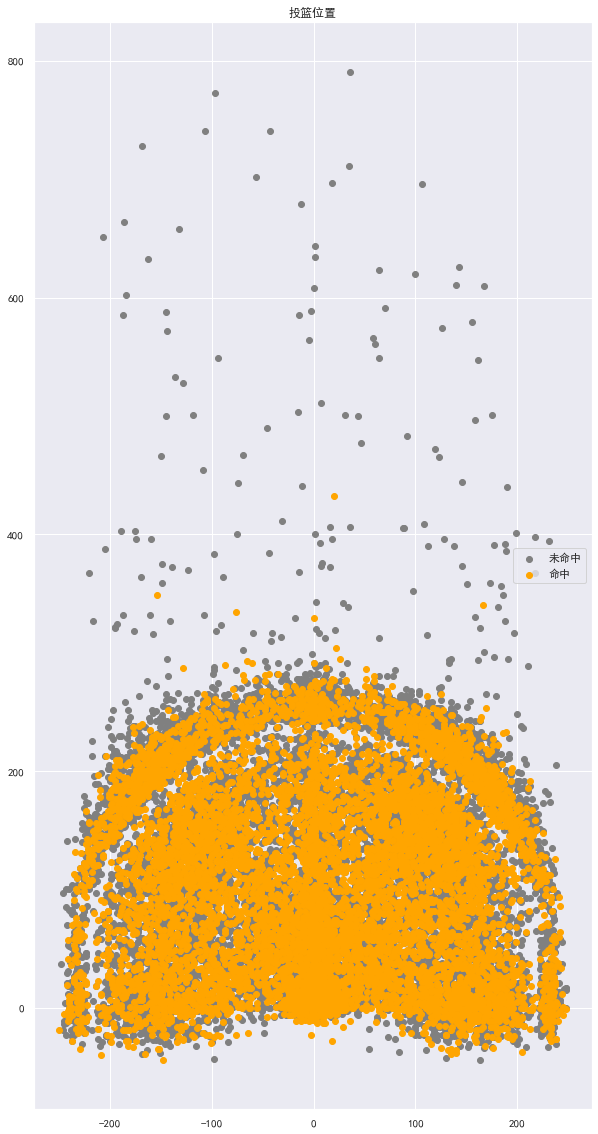

In [20]:
#科比投篮位置
plt.figure(figsize=(10,20))
missed = data[data['shot_made_flag']==0.0]
made = data[data['shot_made_flag']==1.0]

plt.scatter(missed.loc_x, missed.loc_y, color='grey')
plt.scatter(made.loc_x, made.loc_y, color='orange')

label=['未命中','命中']
plt.legend(label,loc=7)
plt.title('投篮位置')

Text(0.5, 1.0, 'shot_zone_range')

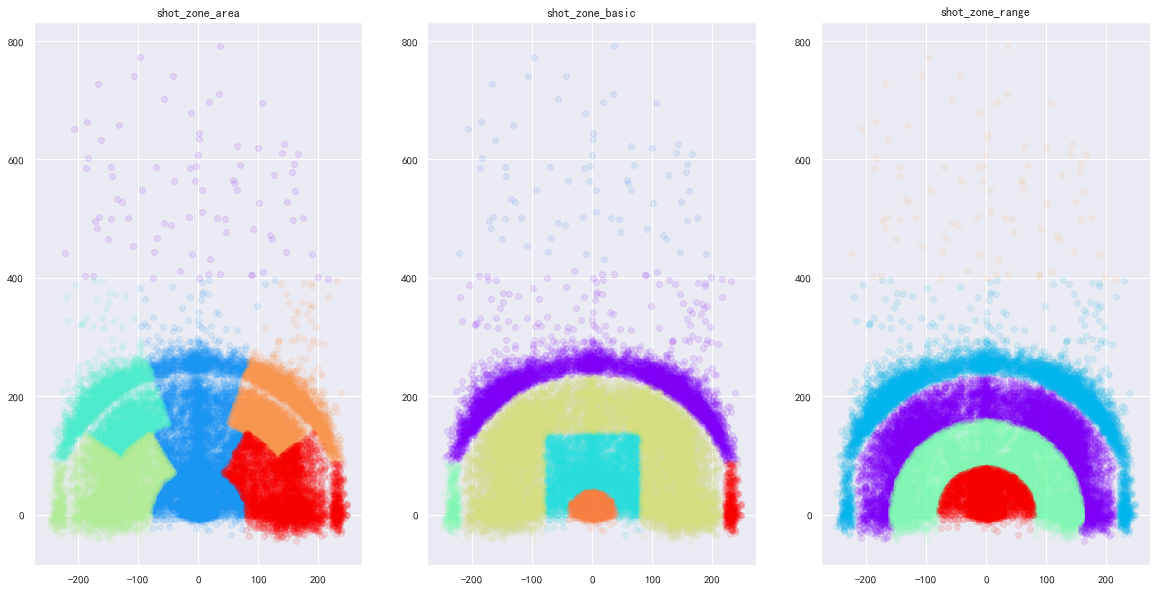

In [21]:
#可视化科比的出手区域，按照不同的标准划分的出手区域
import matplotlib.cm as cm
plt.figure(figsize  = (20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = data.groupby(feat)
    cs = cm.rainbow(np.linspace(0,1,len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1].loc_x,g[1].loc_y,color = c,alpha = alpha)
        
plt.subplot(1,3,1)
scatter_plot_by_category(data['shot_zone_area'])
plt.title('shot_zone_area')

plt.subplot(1,3,2)
scatter_plot_by_category(data['shot_zone_basic'])
plt.title('shot_zone_basic')

plt.subplot(1,3,3)
scatter_plot_by_category(data['shot_zone_range'])
plt.title('shot_zone_range')

投篮的位置、距离、范围这三个属性可以看作一个属性，都是代表投球位置的。这里将三个属性都按具体位置的类别绘制散点图。

第一个图是shot_zone_area属性的，图中红色和橙色是右侧投球区，墨绿色和绿色是左侧投球区，蓝色是中间投球区；第二个图是shot_zone_basic属性的，图中橙色是篮板底下、蓝色是除进攻有理区外的禁区，墨绿色是中距离，紫色是底线之外的三分，红色是右边底线三分，绿色是左边底线三分；第三个图是shot_zone_range属性的，图中红色是除进攻有理区外的禁区，绿色是进攻有理区，紫色是中距离，蓝色是三分线外。这三个图都是对科比投球位置的一个统计。


## 进攻方式与命中率

接着对科比的进攻方式与出手命中率做统计，将每次出手的方式combined_shot_type统计出来，绘制一个饼图，再对每次出手方式不同出手是否命中做一个饼图，观察进攻进攻方式与命中率。

In [22]:
data['combined_shot_type'].unique()
b=data['combined_shot_type']
b=b.value_counts()
b=dict(b)
name=pd.DataFrame(b.keys())
value=pd.DataFrame(b.values())
name=name[0].tolist()
value=value[0].tolist()
words=list(zip(list(name),list(value)))
h=list(zip( list(b.keys()),list(b.values())))
pie = Pie()
pie.add("",words)
pie.set_global_opts(title_opts=opts.TitleOpts(title="科比进攻的方式"))
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
pie.render_notebook()


In [23]:
attack_method = data['combined_shot_type'].value_counts()
shooting = data[data['shot_made_flag']==1]['combined_shot_type'].value_counts()
list1 = attack_method.tolist()
list2 = shooting.tolist()
list3 = attack_method.tolist()
for i in range(len(list1)):
    list3[i] = list2[i]/list1[i]
hits_df = pd.Series(list3)
b=dict(hits_df)
print(attack_method)
print(shooting)
print(list3)
print(b)
b={'Jump Shot': 0.33,
 'Layup': 0.47,
 'Dunk': 0.76,
 'Bank Shot': 0.52,
 'Hook Shot': 0.44,
 'Tip Shot': 0.38}


Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64
Jump Shot    7708
Layup        2561
Dunk          980
Bank Shot      95
Hook Shot      68
Tip Shot       53
Name: combined_shot_type, dtype: int64
[0.3282094954226102, 0.47008076358296624, 0.7620528771384136, 0.5163043478260869, 0.4444444444444444, 0.375886524822695]
{0: 0.3282094954226102, 1: 0.47008076358296624, 2: 0.7620528771384136, 3: 0.5163043478260869, 4: 0.4444444444444444, 5: 0.375886524822695}


In [24]:
name=pd.DataFrame(b.keys())
value=pd.DataFrame(b.values())
name=name[0].tolist()
value=value[0].tolist()
words=list(zip(list(name),list(value)))
h=list(zip( list(b.keys()),list(b.values())))
pie = Pie()
pie.add("",words)
pie.set_global_opts(title_opts=opts.TitleOpts(title="各种进攻方式命中率"))
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
pie.render_notebook()

从图中可以看出，命中率最高的动作类型是Dunk（扣篮）。

